In [142]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

INPUT:
CSV file with the headers ("Chance_of_Attendance,Party_Size") on the first line.  Each line then contains two values separated by a comma.  The first value is the chance of that guest party attending the wedding.  The second number is the total number of people in that guest party (single, couple, family).

ASSUMPTIONS:
Either the whole party attends, or none of the party attends.

In [143]:
# guests = [
# [0.5,2],
# [0.5,2],
# [0.5,2],
# [0.5,2],
# ]

# possbile_guests = len(guests)
# df = pd.DataFrame(guests, index=range(possbile_guests), columns=['Chance_of_Attendance','Party_Size'])

df = pd.read_csv('wedding_guests.csv')

num_simulations = 1000
sim_results = []


df.head()

,Chance_of_Attendance,Party_Size
0,1.0,2
1,1.0,2
2,1.0,2
3,1.0,2
4,1.0,2


In [144]:
df['Attending?'] = df.apply(lambda row: np.random.choice([1,0],p=[row.Chance_of_Attendance, 1-row.Chance_of_Attendance]),axis=1)

df['Attending_Size'] = df['Party_Size'] * df['Attending?']

df.head()

,Chance_of_Attendance,Party_Size,Attending?,Attending_Size
0,1.0,2,1,2
1,1.0,2,1,2
2,1.0,2,1,2
3,1.0,2,1,2
4,1.0,2,1,2


In [145]:
sim_results.append([
  df['Attending?'].sum(),
  df['Attending_Size'].mean(),
  df['Attending_Size'].sum().round(0)])

print(sim_results)

results_df = pd.DataFrame.from_records(sim_results, columns=['Parties Attending','Average Party Size','Total Attendees'])

results_df.head()

[[7, 1.4, 14]]


,Parties Attending,Average Party Size,Total Attendees
0,7,1.4,14


In [146]:
results_df.describe().style.format(precision=2)

,Parties Attending,Average Party Size,Total Attendees
count,1.00,1.00,1.00
mean,7.00,1.40,14.00
std,nan,nan,nan
min,7.00,1.40,14.00
25%,7.00,1.40,14.00
50%,7.00,1.40,14.00
75%,7.00,1.40,14.00
max,7.00,1.40,14.00


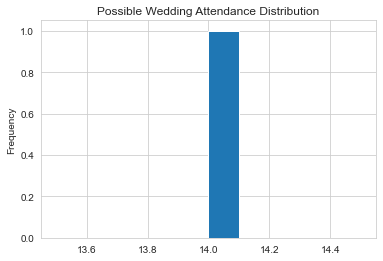

In [147]:
ax = results_df['Total Attendees'].plot(kind='hist', title="Possible Wedding Attendance Distribution", xlabel="Attendees", ylabel='Frequency in 1000 Simulations')